In [300]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [302]:
file_path='co2.csv'
df=pd.read_csv(file_path)
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [304]:
correlation_matrix = df.select_dtypes(include=[np.number]).corr()

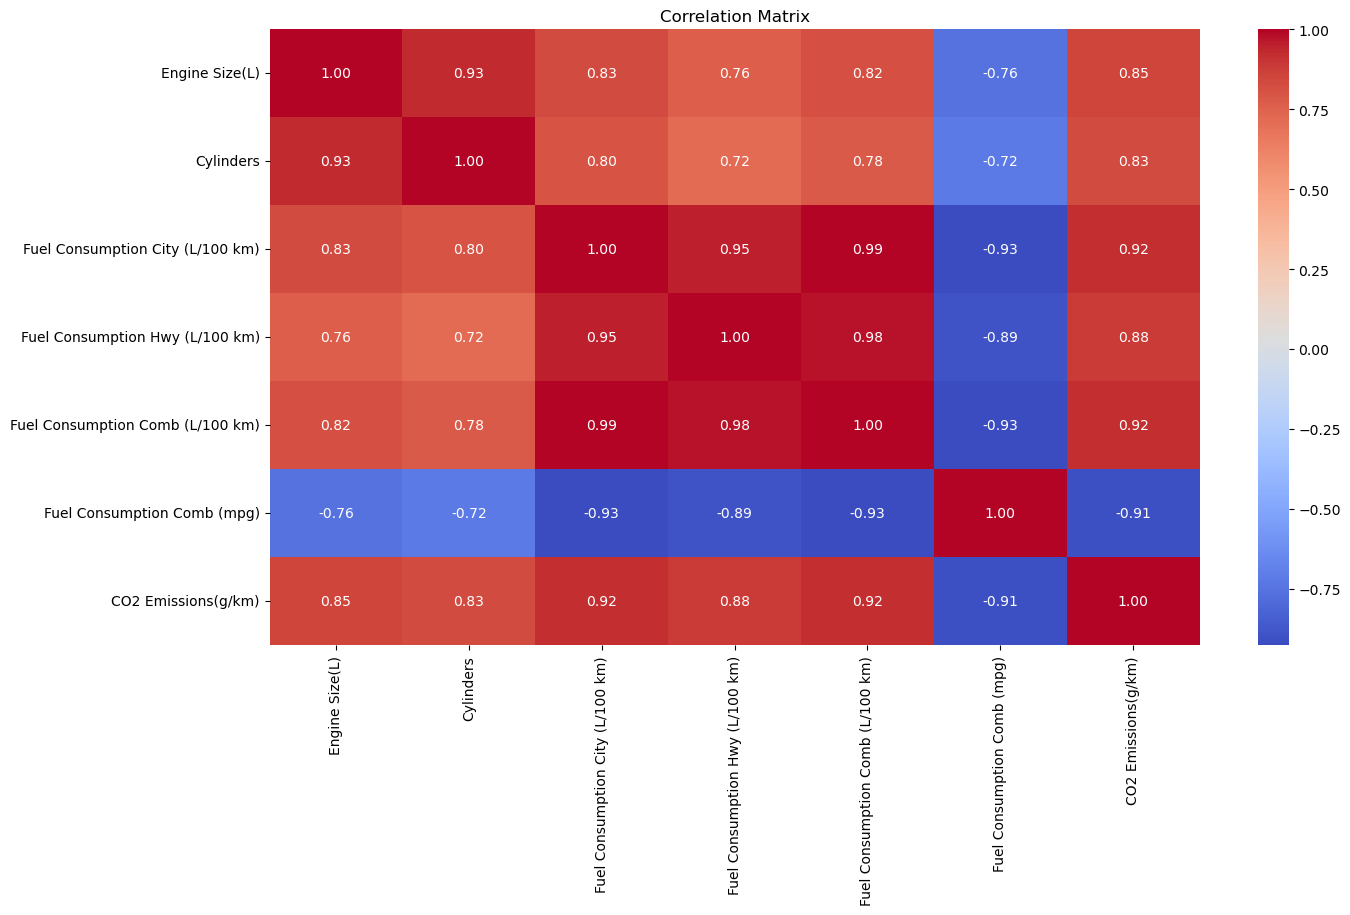

In [306]:
plt.figure(figsize=(15,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [307]:
df = df.drop(columns=["Make", "Model", "Vehicle Class"])

In [310]:
df.isnull().sum()

Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

In [312]:
def one_hot_encode(df, column):
    dummies = pd.get_dummies(df[column], prefix=column)
    df = pd.concat([df, dummies], axis=1)
    df = df.drop(columns=[column])  # Drop original column
    return df
df = one_hot_encode(df, 'Transmission')
df = one_hot_encode(df, 'Fuel Type')

In [314]:
def z_score_normalize(df, columns):
    for column in columns:
        mean = df[column].mean()
        std = df[column].std()
        df[column] = (df[column] - mean) / std
    return df

In [316]:
numerical_columns = ['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)',
                     'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
                     'Fuel Consumption Comb (mpg)']
df = z_score_normalize(df, numerical_columns)

In [318]:
X = df.drop(columns=["CO2 Emissions(g/km)"]).values
y = df["CO2 Emissions(g/km)"].values.reshape(-1, 1)

In [320]:
X = np.array(X, dtype=np.float64)
y = np.array(y, dtype=np.float64)

In [322]:
y = pd.Series(y.squeeze())
y = pd.Series(y)

In [324]:

shuffled_indices = np.random.permutation(len(X))

X_shuffled = X[shuffled_indices]
y_shuffled = y[shuffled_indices]

In [326]:
print(f"Length of X_shuffled: {len(X_shuffled)}")
print(f"Length of y_shuffled: {len(y_shuffled)}")

Length of X_shuffled: 7385
Length of y_shuffled: 7385


In [328]:
split_index = int(0.8 * len(X_shuffled))
X_train, X_test = X_shuffled[:split_index], X_shuffled[split_index:]
y_train, y_test = y_shuffled[:split_index], y_shuffled[split_index:]
print(f"Length of X_train: {len(X_train)}, X_test: {len(X_test)}")
print(f"Length of y_train: {len(y_train)}, y_test: {len(y_test)}")

Length of X_train: 5908, X_test: 1477
Length of y_train: 5908, y_test: 1477


In [330]:
X_train = np.c_[np.ones(X_train.shape[0]), X_train]
X_test = np.c_[np.ones(X_test.shape[0]), X_test]

In [332]:
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost

def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)  # Number of training examples
    cost_history = []

    for i in range(iterations):
        # Calculate the predictions
        predictions = X.dot(theta)  # Shape: (m, 1)
        
        # Calculate the error
        error = predictions - y  # Shape: (m, 1)
        
        # Compute the gradients
        gradients = (1 / m) * X.T.dot(error)  # Shape: (n_features, 1)
        
        # Update theta
        theta -= learning_rate * gradients
        
        # Optionally, store the cost
        cost = (1 / (2 * m)) * np.sum(error**2)
        cost_history.append(cost)

    return theta, cost_history


In [334]:
theta = np.zeros((X.shape[1], 1))  # Ensure theta has shape (n_features, 1)
X = np.c_[np.ones(X.shape[0]), X]  # Add bias term



In [336]:
theta = np.zeros((X_train.shape[1], 1))
y_train = y_train.to_numpy().reshape(-1, 1)  # Convert to NumPy array and reshape
  # Convert y_train to a column vector
# Define learning rate and number of iterations
learning_rate = 0.01  # You can adjust this value based on your optimization needs
iterations = 1000  # Number of iterations for gradient descent


theta, cost_history = gradient_descent(X_train, y_train, theta, learning_rate, iterations)

# Make predictions
y_pred = X_test.dot(theta)  # Ensure X_test includes the bias term


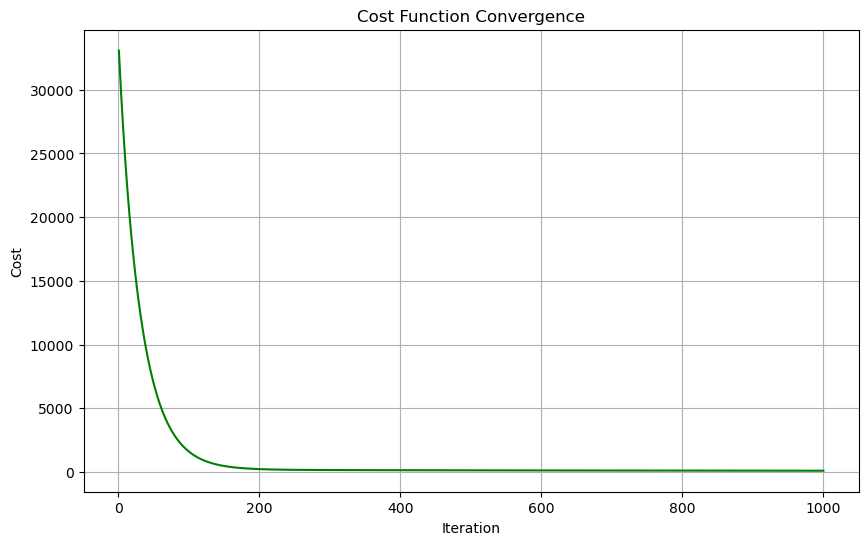

In [338]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cost_history) + 1), cost_history, color='green')
plt.title("Cost Function Convergence")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.grid()
plt.show()

In [340]:
print("Shape of y_test:", y_test.shape)
print("Shape of y_pred:", y_pred.shape)


Shape of y_test: (1477,)
Shape of y_pred: (1477, 1)


In [358]:
y_pred = y_pred.reshape(-1, 1)
y_test = y_test.to_numpy()
y_test = y_test.reshape(-1, 1)

In [360]:
mse = ((y_test - y_pred) ** 2).mean()
print("Mean Squared Error (MSE):", mse)



Mean Squared Error (MSE): 277.8502756054709


In [362]:
# Total sum of squares (SST)
ss_total = ((y_test - y_test.mean()) ** 2).sum()

# Residual sum of squares (SSR)
ss_residual = ((y_test - y_pred) ** 2).sum()

# R² Score
r2_score = 1 - (ss_residual / ss_total)
print("R² Score:", r2_score)

R² Score: 0.920704489585158


In [367]:
import numpy as np

# Calculate Mean Absolute Error (MAE)
mae = np.abs(y_test - y_pred).mean()
print("Mean Absolute Error (MAE):", mae)

# Calculate the range of y_test
ma = y_test.max() - y_test.min()

# Calculate Accuracy
accuracy = (1 - mae / ma) * 100
print(f"Accuracy: {accuracy:.2f}%")


Mean Absolute Error (MAE): 9.39625891692045
Accuracy: 97.79%


**Results:**



***Mean Squared Error (MSE): 277.8502756054709***

***R² Score: 0.920704489585158***

***Mean absolute error:  9.39625891692045***

***Accuracy:  97.79%***